# Dataset description

This dataset consists of **11 features** and a target variable. It includes **6 nominal variables** and **5 numeric variables**. Below is the detailed description of each feature:

1. **Age**: Patient's age in years (**Numeric**).  
2. **Sex**: Gender of the patient, where **1 = Male** and **0 = Female** (**Nominal**).  
3. **Chest Pain Type**: Type of chest pain experienced by the patient, categorized as:  
   - **1 = Typical Angina**  
   - **2 = Atypical Angina**  
   - **3 = Non-Anginal Pain**  
   - **4 = Asymptomatic**  
   (**Nominal**).  
4. **Resting BP S**: Blood pressure at rest (mmHg) (**Numeric**).  
5. **Cholesterol**: Serum cholesterol level (mg/dL) (**Numeric**).  
6. **Fasting Blood Sugar**: Fasting blood sugar > 120 mg/dL:  
   - **1 = True**  
   - **0 = False**  
   (**Nominal**).  
7. **Resting ECG**: Results of electrocardiogram at rest:  
   - **0 = Normal**  
   - **1 = Abnormality in ST-T wave**  
   - **2 = Left Ventricular Hypertrophy**  
   (**Nominal**).  
8. **Max Heart Rate**: Maximum heart rate achieved (**Numeric**).  
9. **Exercise Angina**: Angina induced by exercise:  
   - **0 = No**  
   - **1 = Yes**  
   (**Nominal**).  
10. **Oldpeak**: Exercise-induced ST depression compared to rest (**Numeric**).  
11. **ST Slope**: Slope of the ST segment during peak exercise:  
    - **0 = Normal**  
    - **1 = Upsloping**  
    - **2 = Flat**  
    - **3 = Downsloping**  
    (**Nominal**).  

### Target Variable
12. **Target**: Indicates the presence of heart disease:  
    - **1 = At risk**  
    - **0 = No risk**.


## Importing the necessary libraries to get started.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline 

import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from scipy import stats

## Loading dataset

In [2]:
df_2 = pd.read_csv("data/HD_Data_2.csv")

In [3]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [4]:
df_2.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
df_2.shape

(1190, 12)

In [6]:
df_2["oldpeak"].nunique()

53

## Data preprocessing

In [7]:
# renaming features to proper name
df_2.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [8]:

df_2['chest_pain_type'] = df_2['chest_pain_type'].astype('object')
df_2['rest_ecg'] = df_2['rest_ecg'].astype('object')
df_2['st_slope'] = df_2['st_slope'].astype('object')


df_2.loc[df_2['chest_pain_type'] == 1, 'chest_pain_type'] = 'typical angina'
df_2.loc[df_2['chest_pain_type'] == 2, 'chest_pain_type'] = 'atypical angina'
df_2.loc[df_2['chest_pain_type'] == 3, 'chest_pain_type'] = 'non-anginal pain'
df_2.loc[df_2['chest_pain_type'] == 4, 'chest_pain_type'] = 'asymptomatic'

df_2.loc[df_2['rest_ecg'] == 0, 'rest_ecg'] = 'normal'
df_2.loc[df_2['rest_ecg'] == 1, 'rest_ecg'] = 'ST-T wave abnormality'
df_2.loc[df_2['rest_ecg'] == 2, 'rest_ecg'] = 'left ventricular hypertrophy'

df_2.loc[df_2['st_slope'] == 0, 'st_slope'] = 'normal'
df_2.loc[df_2['st_slope'] == 1, 'st_slope'] = 'upsloping'
df_2.loc[df_2['st_slope'] == 2, 'st_slope'] = 'flat'
df_2.loc[df_2['st_slope'] == 3, 'st_slope'] = 'downsloping'

df_2['sex'] = df_2['sex'].apply(lambda x: 'male' if x == 1 else 'female')


In [9]:
df_2.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


We successfully loaded our dataset, but before proceeding, it’s essential to ensure the data is clean and ready for analysis. This involves checking for duplicate and missing values, as duplicates can distort results and missing values can lead to biased insights or errors if not handled properly. Additionally, we must identify and address outliers, which are data points that differ significantly from the rest of the observations. Outliers can arise due to measurement errors, variability, or unexpected occurrences and may negatively impact the analysis or model performance. By detecting and removing or managing these anomalies, we can enhance the reliability and accuracy of our results.

In [10]:
df_2.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

No missing values found

In [11]:
print(df_2.duplicated().sum())

272


We identified 272 duplicate entries in our dataset, which is significant compared to the overall size. Having such a large number of duplicates can negatively impact the quality and reliability of our analysis. To ensure the integrity of our dataset and avoid skewed results, it is crucial to remove these duplicates.

In [12]:
df_2

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,male,typical angina,110,264,0,normal,132,0,1.2,flat,1
1186,68,male,asymptomatic,144,193,1,normal,141,0,3.4,flat,1
1187,57,male,asymptomatic,130,131,0,normal,115,1,1.2,flat,1
1188,57,female,atypical angina,130,236,0,left ventricular hypertrophy,174,0,0.0,flat,1


In [13]:
df_2.drop_duplicates(keep="last",inplace=True)
df_2.duplicated().sum()

0

In [14]:
df_2.shape

(918, 12)

### **Distribution of Heart disease (data visualization)**

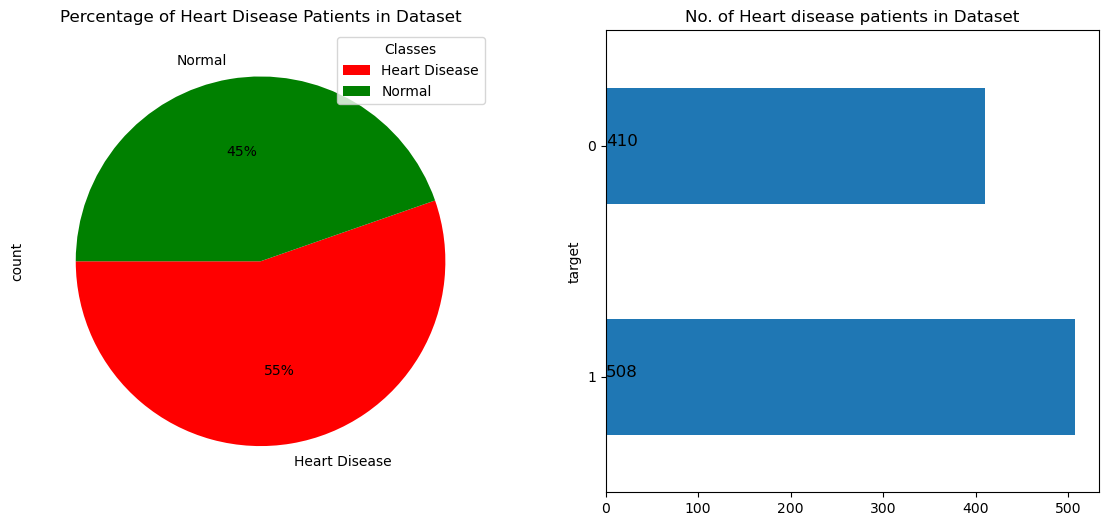

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

colors = ['red', 'green']  # Assign colors to classes
ax1 = df_2['target'].value_counts().plot.pie(
    autopct="%1.0f%%",
    labels=["Heart Disease", "Normal"],
    startangle=180,
    colors=colors,
    ax=ax1
)
ax1.set(title='Percentage of Heart Disease Patients in Dataset')
ax1.legend(["Heart Disease", "Normal"], loc="upper right", title="Classes")  # Add legend

ax2 = df_2["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(df_2["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

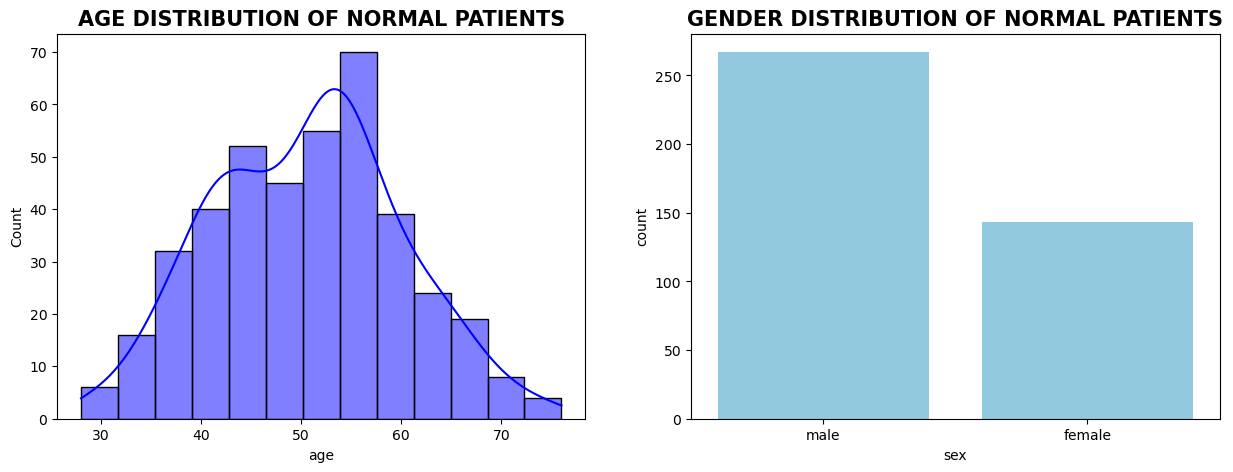

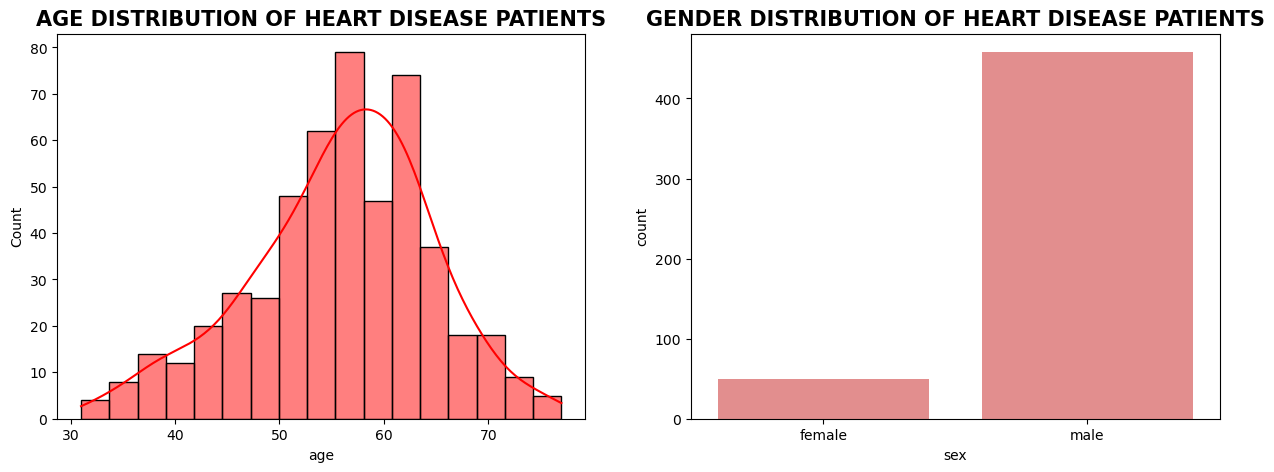

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data subsets
attr_1 = df_2[df_2['target'] == 1]
attr_0 = df_2[df_2['target'] == 0]

# Plot for Normal Patients
fig = plt.figure(figsize=(15, 5))

# Age Distribution
ax1 = plt.subplot2grid((1, 2), (0, 0))
sns.histplot(attr_0['age'], kde=True, color="blue")
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

# Gender Distribution
ax1 = plt.subplot2grid((1, 2), (0, 1))
sns.countplot(x='sex', data=attr_0, color='skyblue')  # Removed palette, added color
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')
plt.show()

# Plot for Heart Disease Patients
fig = plt.figure(figsize=(15, 5))

# Age Distribution
ax1 = plt.subplot2grid((1, 2), (0, 0))
sns.histplot(attr_1['age'], kde=True, color="red")
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

# Gender Distribution
ax1 = plt.subplot2grid((1, 2), (0, 1))
sns.countplot(x='sex', data=attr_1, color='lightcoral')  # Removed palette, added color
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')
plt.show()


## Outlier Detection

Detecting outlier using z-score

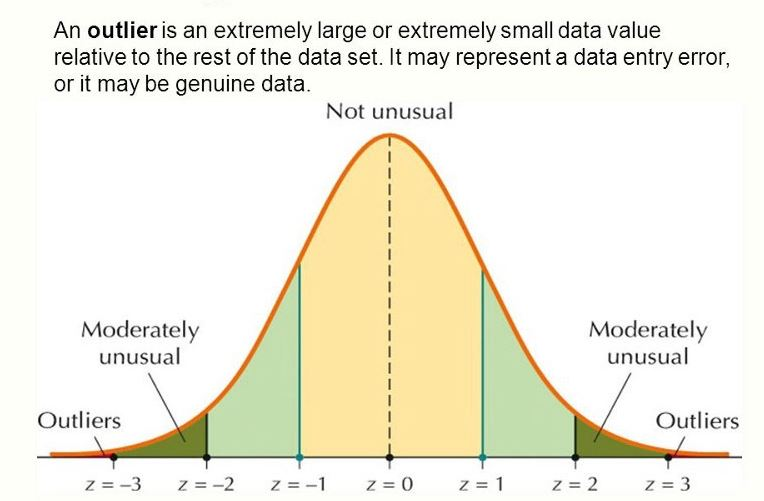

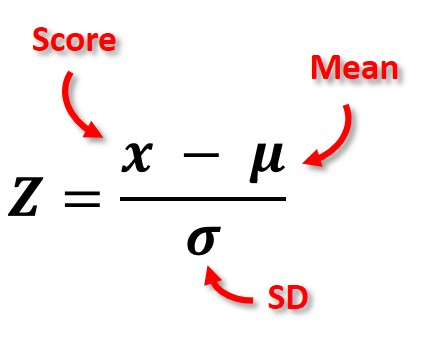

In [17]:
df_numeric = df_2[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [18]:
df_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [19]:
df_zscore = np.abs(stats.zscore(df_numeric))
print(df_zscore)

           age  resting_blood_pressure  cholesterol  max_heart_rate_achieved
0     1.433140                0.410909     0.825070                 1.382928
1     0.478484                1.491752     0.171961                 0.754157
2     1.751359                0.129513     0.770188                 1.525138
3     0.584556                0.302825     0.139040                 1.132156
4     0.051881                0.951331     0.034755                 0.581981
...        ...                     ...          ...                      ...
1185  0.902775                1.210356     0.596393                 0.188999
1186  1.536902                0.627078     0.053049                 0.164684
1187  0.370100                0.129513     0.620168                 0.857069
1188  0.370100                0.129513     0.340275                 1.461525
1189  1.645286                0.302825     0.217696                 1.422226

[918 rows x 4 columns]


In [20]:
# Defining threshold for filtering outliers where threshold is 3
print(np.where(df_zscore > 3))

(array([ 76, 108, 148, 241, 365, 390, 399, 449, 591, 741, 767, 803],
      dtype=int64), array([2, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1], dtype=int64))


In [21]:
df_2 = df_2[(df_zscore < 3).all(axis=1)]

In [22]:
df_2.shape

(906, 12)

In [23]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 906 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      906 non-null    int64  
 1   sex                      906 non-null    object 
 2   chest_pain_type          906 non-null    object 
 3   resting_blood_pressure   906 non-null    int64  
 4   cholesterol              906 non-null    int64  
 5   fasting_blood_sugar      906 non-null    int64  
 6   rest_ecg                 906 non-null    object 
 7   max_heart_rate_achieved  906 non-null    int64  
 8   exercise_induced_angina  906 non-null    int64  
 9   st_depression            906 non-null    float64
 10  st_slope                 906 non-null    object 
 11  target                   906 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 92.0+ KB


Before splitting the cleaned dataset into training and testing sets, it is essential to convert categorical data into a format that machine learning algorithms can process and understand. This typically involves encoding techniques such as **one-hot encoding** or **label encoding**, which transform categorical variables into numerical representations without losing their inherent meaning or introducing bias.

In [24]:
nominal_columns = ['sex', 'chest_pain_type', 'rest_ecg', 'st_slope']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids dummy variable trap

# Apply one-hot encoding to the nominal columns
encoded_data = encoder.fit_transform(df_2[nominal_columns])

# Create a DataFrame for the encoded data with column names based on original feature and categories
encoded_columns = encoder.get_feature_names_out(nominal_columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns, index=df_2.index)

# Drop the original nominal columns and concatenate the encoded DataFrame
processed_data = pd.concat([df_2.drop(columns=nominal_columns), encoded_df], axis=1)

# Ensure the encoded columns are integers (if they were converted to float)
processed_data[encoded_df.columns] = processed_data[encoded_df.columns].astype(int)

processed_data.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_normal,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,1,1,0,0,0,1,0,0,1
1,49,160,180,0,156,0,1.0,1,0,0,1,0,0,1,1,0,0
2,37,130,283,0,98,0,0.0,0,1,1,0,0,0,0,0,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,0,1,1,0,0
4,54,150,195,0,122,0,0.0,0,1,0,1,0,0,1,0,0,1


In [25]:
processed_data["st_depression"].nunique()

53

#### Feature normalization

In this step, we will normalize all numeric features to a range of 0 to 1 to enhance the model's performance and ensure consistent scaling across the dataset.

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

processed_data[["age","resting_blood_pressure","cholesterol","max_heart_rate_achieved","st_depression"]]=scaler.fit_transform(
    processed_data[["age","resting_blood_pressure","cholesterol","max_heart_rate_achieved","st_depression"]])
processed_data.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_normal,st_slope_upsloping
0,0.244898,0.571429,0.557915,0,0.784173,0,0.295455,0,1,1,0,0,0,1,0,0,1
1,0.428571,0.761905,0.347490,0,0.669065,0,0.409091,1,0,0,1,0,0,1,1,0,0
2,0.183673,0.476190,0.546332,0,0.251799,0,0.295455,0,1,1,0,0,0,0,0,0,1
3,0.408163,0.552381,0.413127,0,0.323741,1,0.465909,1,0,0,0,0,0,1,1,0,0
4,0.530612,0.666667,0.376448,0,0.424460,0,0.295455,0,1,0,1,0,0,1,0,0,1


## Cross-validation and model building

In [27]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


def GetSelectedModels():
    selectedModels = []
    selectedModels.append(('Logistic Regression(l2)', LogisticRegression(penalty='l2')))
    selectedModels.append(('Random Forest (Gini)', RandomForestClassifier(criterion='gini', n_estimators=100)))
    selectedModels.append(('Random Forest (Entropy)', RandomForestClassifier(criterion='entropy', n_estimators=100)))
    selectedModels.append(('SVM (Linear)', SVC(kernel='linear', gamma='auto', probability=True)))
    selectedModels.append(('SVM (RBF)', SVC(kernel='rbf', gamma='auto', probability=True)))
    selectedModels.append(('Decision Tree (Gini)', DecisionTreeClassifier(criterion='gini')))
    selectedModels.append(('Decision Tree (Entropy)', DecisionTreeClassifier(criterion='entropy')))
    return selectedModels

# Function to perform 10-fold cross-validation on the selected models
def EvaluateSelectedModels(X_train, y_train, models):
    num_folds = 7
    seed = 42
    results = []
    names = []
    
    for name, model in models:
        kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
        results.append(cv_results)
        names.append(name)
        print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")
    
    return names, results

In [28]:
X = processed_data.drop(['target'],axis=1)
y = processed_data['target']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, shuffle=True, random_state=42)

In [30]:
models = GetSelectedModels()
names,results = EvaluateSelectedModels(X_train, y_train,models)

Logistic Regression(l2): 0.8645 (0.0358)
Random Forest (Gini): 0.8728 (0.0368)
Random Forest (Entropy): 0.8701 (0.0386)
SVM (Linear): 0.8687 (0.0300)
SVM (RBF): 0.8452 (0.0414)
Decision Tree (Gini): 0.7776 (0.0306)
Decision Tree (Entropy): 0.7721 (0.0465)


### Hyperparameter tuning 

In [33]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [34]:
lr_grid =  {"C": np.logspace(-4, 4, 20),
            "solver": ["liblinear","saga"],
            "penalty": ["l1","l2"],
            "max_iter": np.arange(100,1000,100)
           }

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50), # Number of trees
           "max_depth": [None, 10, 20, 30, 50],  # Maximum depth of the trees
           "min_samples_split": np.arange(2, 20, 2), # Minimum number of samples required to split an internal node
           "min_samples_leaf": np.arange(1, 20, 2), # Minimum number of samples required to be at a leaf node
           "max_features": ["sqrt", "log2", None],  # Number of features to consider when looking for the best split
           "bootstrap": [True, False],  # Whether to use bootstrap sampling
            } 

svm_grid = {'C': [0.1, 1, 10, 100],
                       'kernel': ['linear', 'rbf', 'sigmoid'],
                       'gamma': ['scale', 'auto', 1e-3, 1e-2, 1e-1, 1, 10],
                       'degree': [2, 3, 4, 5],  # Only applicable for 'poly'
                       'class_weight': [None, 'balanced']
                      }

In [35]:
lr = LogisticRegression()

# RandomizedSearchCV for LogisticRegression
lr_random_search = RandomizedSearchCV(
    estimator=lr,
    param_distributions=lr_grid,
    n_iter=20,
    scoring='accuracy',
    cv=10,
    verbose=True,
    random_state=42,
    n_jobs=-1
)

lr_random_search.fit(X_train, y_train)

print("Best Parameters for LogisticRegression:", lr_random_search.best_params_)
print("Best Score for LogisticRegression:", lr_random_search.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best Parameters for LogisticRegression: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 600, 'C': 11.288378916846883}
Best Score for LogisticRegression: 0.8717465753424657


In [36]:
rf = RandomForestClassifier(criterion="entropy")

rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_grid,
    n_iter=50,  # Number of parameter settings to sample
    scoring='accuracy',  # Scoring metric
    cv=7,  # Cross-validation splits
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available processors
)

rf_random_search.fit(X_train, y_train)

print("Best Parameters for RandomForest:", rf_random_search.best_params_)
print("Best Score for RandomForest:", rf_random_search.best_score_)

Fitting 7 folds for each of 50 candidates, totalling 350 fits
Best Parameters for RandomForest: {'n_estimators': 10, 'min_samples_split': 14, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best Score for RandomForest: 0.87163928304705


In [43]:
svc = SVC(probability=True)

svc_random_search = RandomizedSearchCV(estimator=svc, param_distributions=svm_grid,
                                   n_iter=50, scoring='accuracy', cv=5, random_state=42, verbose=2)

# Fit the model
svc_random_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", svc_random_search.best_params_)
print("Best score:", svc_random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=10, class_weight=None, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=5, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=5, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=5, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=5, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, degree=5, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_we

### Hyperparameter tuning with GridSearchCV

In [39]:
lr = LogisticRegression(random_state=42)
# RandomizedSearchCV for LogisticRegression
grid_search_lr = GridSearchCV(
    estimator=lr,
    param_grid=lr_grid,
    scoring='accuracy',
    cv=10,
    verbose=True,
    n_jobs=-1
)

grid_search_lr.fit(X_train, y_train)

print("Best Parameters for LogisticRegression:", grid_search_lr.best_params_)
print("Best Score for LogisticRegression:", grid_search_lr.best_score_)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits
Best Parameters for LogisticRegression: {'C': 11.288378916846883, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score for LogisticRegression: 0.8717465753424657


In [40]:
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                              scoring='accuracy', cv=5, verbose=2)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

## Evaluating trained models with Evaluation metrics

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Logistic Regression (RandomizedSearchCV)
lr_best = lr_random_search.best_estimator_
y_pred_lr = lr_best.predict(X_test)

print("Logistic Regression (RandomizedSearchCV):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr, average='weighted'):.4f}")

# Random Forest (RandomizedSearchCV)
rf_best = rf_random_search.best_estimator_
y_pred_rf = rf_best.predict(X_test)

print("\nRandom Forest (RandomizedSearchCV):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")

# SVC (RandomizedSearchCV)
svc_best = svc_random_search.best_estimator_
y_pred_svc = svc_best.predict(X_test)

print("\nSVC (RandomizedSearchCV):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svc, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svc, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svc, average='weighted'):.4f}")

# Logistic Regression (GridSearchCV)
lr_grid_best = grid_search_lr.best_estimator_
y_pred_lr_grid = lr_grid_best.predict(X_test)

print("\nLogistic Regression (GridSearchCV):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_grid):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr_grid, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr_grid, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr_grid, average='weighted'):.4f}")

# Random Forest (GridSearchCV)
rf_grid_best = grid_search_rf.best_estimator_
y_pred_rf_grid = rf_grid_best.predict(X_test)

print("\nRandom Forest (GridSearchCV):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_grid):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf_grid, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf_grid, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf_grid, average='weighted'):.4f}")


Logistic Regression (RandomizedSearchCV):
Accuracy: 0.8571
Precision: 0.8576
Recall: 0.8571
F1 Score: 0.8573

Random Forest (RandomizedSearchCV):
Accuracy: 0.8462
Precision: 0.8467
Recall: 0.8462
F1 Score: 0.8455

SVC (RandomizedSearchCV):
Accuracy: 0.8626
Precision: 0.8628
Recall: 0.8626
F1 Score: 0.8627

Logistic Regression (GridSearchCV):
Accuracy: 0.8516
Precision: 0.8519
Recall: 0.8516
F1 Score: 0.8517

Random Forest (GridSearchCV):
Accuracy: 0.8407
Precision: 0.8405
Recall: 0.8407
F1 Score: 0.8404


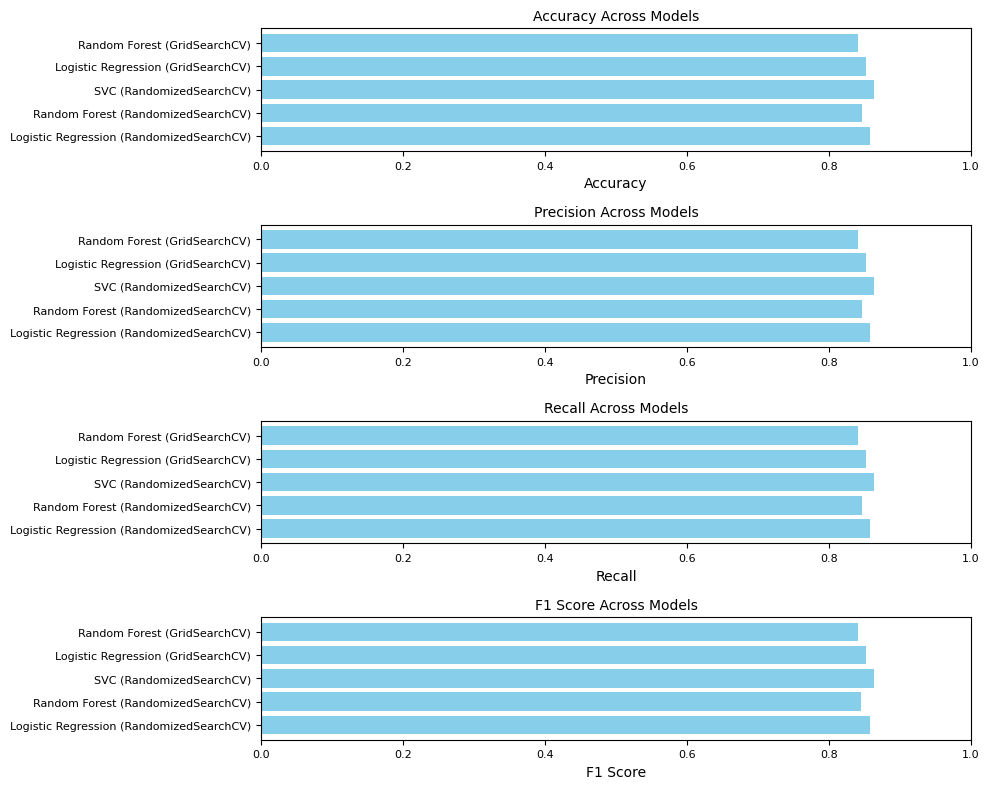

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to compute all metrics for a given model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Evaluate each model
models = {
    "Logistic Regression (RandomizedSearchCV)": lr_best,
    "Random Forest (RandomizedSearchCV)": rf_best,
    "SVC (RandomizedSearchCV)": svc_best,
    "Logistic Regression (GridSearchCV)": lr_grid_best,
    "Random Forest (GridSearchCV)": rf_grid_best
}

metrics = {
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

for name, model in models.items():
    acc, prec, rec, f1 = evaluate_model(model, X_test, y_test)
    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(prec)
    metrics["Recall"].append(rec)
    metrics["F1 Score"].append(f1)

# Plot each metric as a separate bar chart
model_names = list(models.keys())
metric_names = list(metrics.keys())

plt.figure(figsize=(10, 8))  # Reduce the overall figure size

for i, metric in enumerate(metric_names, 1):
    plt.subplot(len(metric_names), 1, i)  # Stack the plots vertically
    plt.barh(model_names, metrics[metric], color='skyblue')
    plt.xlabel(metric)
    plt.title(f"{metric} Across Models", fontsize=10)
    plt.xlim(0, 1)  # Metrics range between 0 and 1
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()  # Adjust spacing to avoid overlap
plt.show()



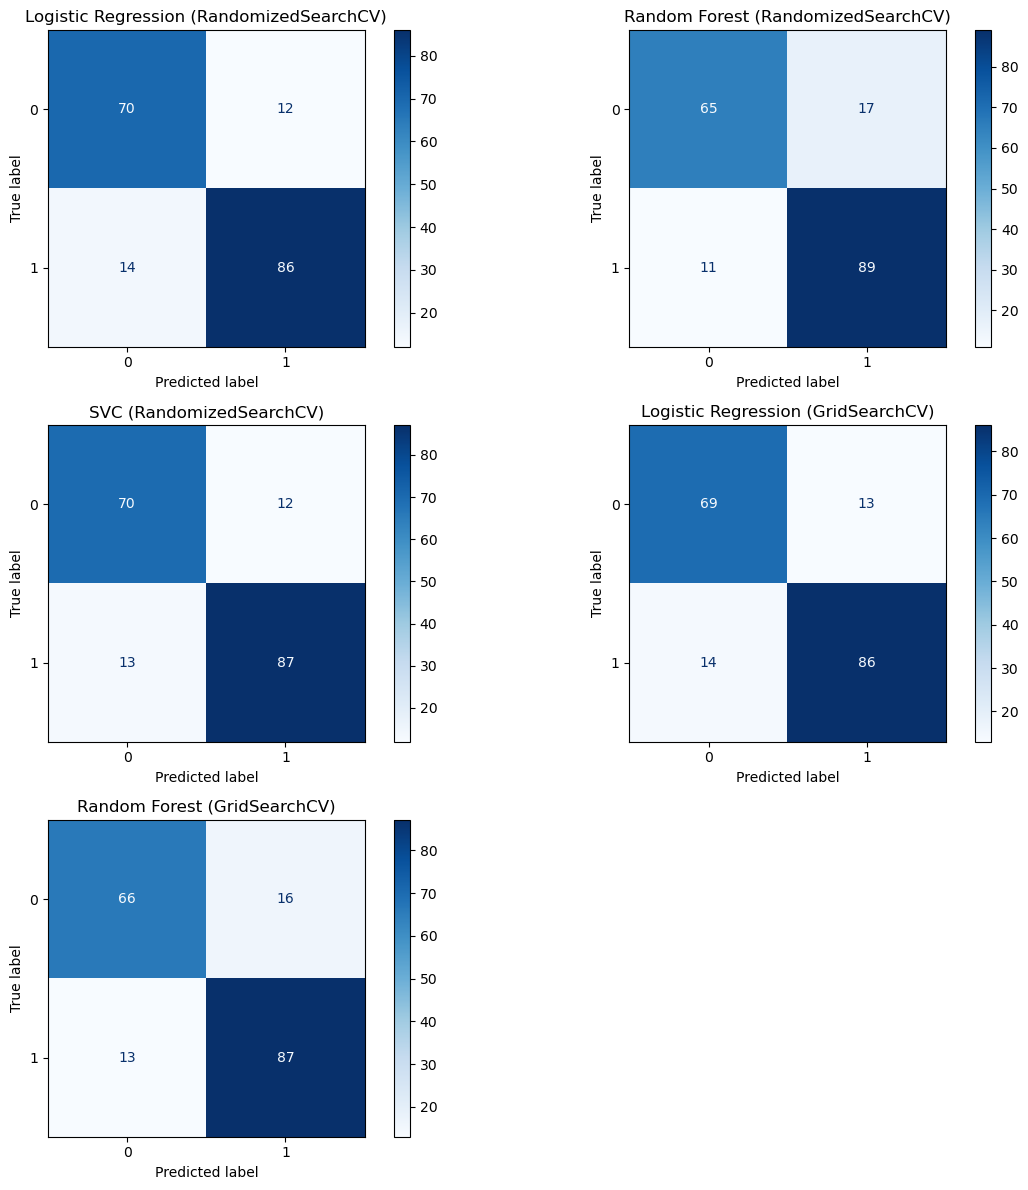

In [51]:
def plot_confusion_matrices(models, X_test, y_test):
    fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # 3 rows, 2 columns
    axes = axes.flatten()  # Flatten to iterate easily
    for idx, (name, model) in enumerate(models.items()):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues', ax=axes[idx])
        axes[idx].set_title(name)
    # Remove extra subplot if fewer than 6 models
    for idx in range(len(models), len(axes)):
        fig.delaxes(axes[idx])
    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_confusion_matrices(models, X_test, y_test)

# Model Reports

In this report, I will analyze and reflect on the performance of five different machine learning models—Logistic Regression, Random Forest, and Support Vector Machine (SVM)—tuned with either RandomizedSearchCV or GridSearchCV for the task of heart disease prediction. The models were evaluated based on accuracy, precision, recall, and F1 score.

## 1.Logistic Regression (RandomizedSearchCV):

**Accuracy: 85.71%**

**Precision: 85.76%**

**Recall: 85.71%**

**F1 Score: 85.73%**

This Logistic Regression model demonstrates balanced and solid performance across all metrics. With an accuracy of 85.71% and an F1 score of 85.73%, it shows that the model is capable of providing a good balance between correctly identifying heart disease cases (recall) and minimizing false positives (precision). This is important for heart disease prediction, where we want to avoid both missing positive cases and flagging too many false positives. I find this model to be reliable, especially in clinical applications where balanced performance is crucial.

## 2.Random Forest (RandomizedSearchCV):

**Accuracy: 84.62%**

**Precision: 84.67%**

**Recall: 84.62%**

**F1 Score: 84.55%**

The Random Forest model performs similarly to Logistic Regression, with accuracy, precision, and recall around 84-85%. While its performance is strong, it lags slightly behind Logistic Regression in terms of F1 score (84.55%). Random Forest is often more effective in capturing complex relationships in data, which is useful in predicting heart disease, but further tuning could help optimize its performance. This model is good for handling intricate patterns in the data, though minimizing false positives would be important in a healthcare context.

## 3.SVM (RandomizedSearchCV):

**Accuracy: 86.26%**

**Precision: 86.28%**

**Recall: 86.26%**

**F1 Score: 86.27%**

The SVM model stands out with the highest performance across all metrics, achieving an accuracy of 86.26% and an F1 score of 86.27%. Given its strong precision and recall, I believe this model is highly suited for heart disease prediction, where both minimizing false negatives (not detecting heart disease when it's present) and false positives (unnecessary interventions) are critical. Its performance makes it an excellent candidate for clinical applications where both false positives and false negatives must be minimized.

## 4.Logistic Regression (GridSearchCV):

**Accuracy: 85.16%**

**Precision: 85.19%**

**Recall: 85.16%**

**F1 Score: 85.17%**

This GridSearchCV-tuned Logistic Regression model is quite similar to the RandomizedSearchCV version, with slightly lower performance across all metrics. However, it still delivers solid accuracy and F1 score (85.17%), making it a dependable model for balanced performance. It’s a good option for heart disease prediction, as the model’s consistent behavior suggests reliability. While the improvement from RandomizedSearchCV is marginal, the additional tuning may still help it perform slightly better in some cases.

## 5.Random Forest (GridSearchCV):

**Accuracy: 84.07%**

**Precision: 84.05%**

**Recall: 84.07%**

**F1 Score: 84.04%**

The GridSearchCV-tuned Random Forest model performs slightly worse than its RandomizedSearchCV counterpart, with all metrics around 84%. This suggests that while GridSearchCV may have led to some optimization, it didn't significantly boost performance. However, given its solid performance, this model could still be a useful tool in heart disease prediction, especially if further tuning or feature engineering is applied. It’s good for handling complex data, but further refinement could help improve its precision and recall balance.

### Personal Thoughts:
For heart disease prediction, the SVM (RandomizedSearchCV) model stands out as the top performer, with the highest accuracy, precision, recall, and F1 score. Its strong performance makes it an excellent choice for clinical applications where both minimizing false negatives (missed diagnoses) and false positives (unnecessary treatments) are crucial. Logistic Regression (RandomizedSearchCV) is also a strong contender, providing very balanced performance that would be reliable for heart disease prediction. However, the Random Forest models, especially the GridSearchCV version, perform slightly worse, which suggests they may benefit from additional tuning or a different approach. In any case, all models are quite capable, and the final choice would depend on the specific problem context, with SVM being a standout for situations requiring both high precision and recall.